10가지의 의류(0~9)를 예측하는 다중 분류 문제

데이터 준비하기

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


데이터 그려보기

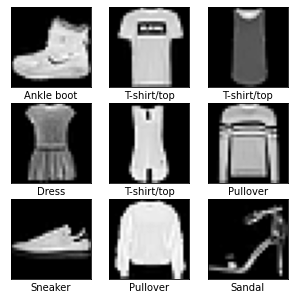

In [3]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

# Fashion-MNIST의 레이블에 해당하는 품목입니다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
# 0 ~ 59999의 범위에서 무작위로 9개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size=sample_size) 

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

전처리 및 검증 데이터셋 만들기

In [5]:
# 값의 범위를 0~1 사이로 만들기 -> 스케일링 ->minmax알고리즘

x_train = x_train / 255
x_test = x_test / 255

print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [6]:
# 레이블 (정답지) 범주형 데이터로 변경
from tensorflow.keras.utils import to_categorical

# 실제 정답 비교를 위해 0-9 정답지 따로 저장
real_y_test = y_test

# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_test= to_categorical(y_test)

In [7]:
# 검증 데이터 세트 만들기

In [8]:
from sklearn.model_selection import train_test_split

# 훈련/검증 데이터를 7:3 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.3,
                                                  random_state=777)

첫 번째 모델 구성하기

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

first_model = Sequential()

first_model.add(Flatten(input_shape=(28,28))) #Flatten(28,28)->(28*28)->1차원 784로 변환해준다.
first_model.add(Dense(64, activation='relu'))
first_model.add(Dense(32, activation='relu'))
first_model.add(Dense(10, activation='softmax'))

In [10]:
first_model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy']) #리스트 형태로 되어있음

In [11]:
first_history=first_model.fit(x_train, y_train,
                  epochs=30,
                  batch_size=128,
                  validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 2s 4ms/step - loss: 0.6617 - accuracy: 0.7716 - val_loss: 0.4867 - val_accuracy: 0.8299
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4415 - accuracy: 0.8438 - val_loss: 0.4351 - val_accuracy: 0.8459
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4011 - accuracy: 0.8573 - val_loss: 0.3912 - val_accuracy: 0.8613
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3732 - accuracy: 0.8663 - val_loss: 0.4119 - val_accuracy: 0.8480
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3532 - accuracy: 0.8712 - val_loss: 0.3704 - val_accuracy: 0.8691
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3380 - accuracy: 0.8766 - val_loss: 0.3590 - val_accuracy: 0.8713
Epoch 7/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3244 - accuracy: 0.8810 - val_loss: 0.3590 - val_accuracy: 0.8729
Epoch 

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

second_model = Sequential()

#입력 데이터의 형태를 꼭 명시해야 합니다.
second_model.add(Flatten(input_shape=(28,28))) #Flatten(28,28)->(28*28)->1차원 784로 변환해준다.
second_model.add(Dense(128, activation='relu')) #128개의 출력을 가지는 Dense층을 추가합니다.<-기존 모델보다 층 하나 더 추가
second_model.add(Dense(64, activation='relu')) #64개의 출력을 가지는 Dense층
second_model.add(Dense(32, activation='relu')) #32개의 출력을 가지는 Dense층
second_model.add(Dense(10, activation='softmax')) #10개의 출력을 가지는 신경망

second_model.compile(optimizer='adam',  #옵티마이저 : Adam
                     loss = 'categorical_crossentropy', # 손실함수 : categofical_crossentropy
                     metrics =['accuracy']) #모니터링 할 평가지표 :acc(정확도)

second_history= second_model.fit(x_train, y_train,
                  epochs=30,
                  batch_size=128,
                  validation_data=(x_val, y_val))                     

Epoch 1/30
329/329 [==============================] - 2s 5ms/step - loss: 0.6464 - accuracy: 0.7720 - val_loss: 0.4426 - val_accuracy: 0.8445
Epoch 2/30
329/329 [==============================] - 2s 5ms/step - loss: 0.4229 - accuracy: 0.8476 - val_loss: 0.4213 - val_accuracy: 0.8473
Epoch 3/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3833 - accuracy: 0.8612 - val_loss: 0.3674 - val_accuracy: 0.8723
Epoch 4/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3507 - accuracy: 0.8710 - val_loss: 0.3652 - val_accuracy: 0.8700
Epoch 5/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3265 - accuracy: 0.8802 - val_loss: 0.3420 - val_accuracy: 0.8753
Epoch 6/30
329/329 [==============================] - 1s 5ms/step - loss: 0.3115 - accuracy: 0.8859 - val_loss: 0.3369 - val_accuracy: 0.8822
Epoch 7/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3024 - accuracy: 0.8876 - val_loss: 0.3371 - val_accuracy: 0.8802
Epoch 

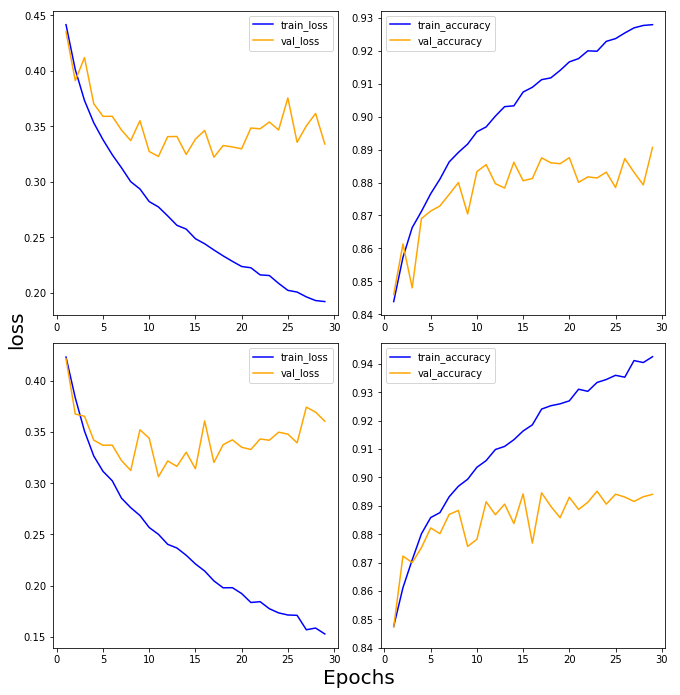

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], 
                     color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], 
                     color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()
    
draw_loss_acc(first_history, second_history, 30)



모델 평가하기

In [14]:
print(first_model.evaluate(x_test, y_test))
print(second_model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.3686 - accuracy: 0.8762
[0.36859285831451416, 0.8762000203132629]
313/313 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.8825
[0.419401079416275, 0.8824999928474426]


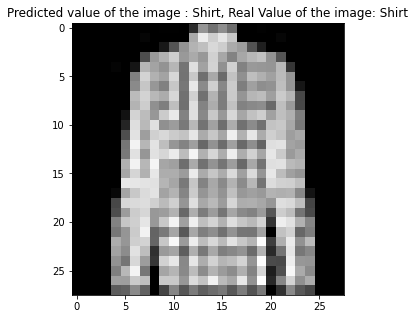

In [18]:
import numpy as np

results = first_model.predict(x_test)
np.set_printoptions(precision=7) # numpy 소수점 제한

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.

import matplotlib.pyplot as plt

sample_size = 10
# 0 ~ 9999의 범위에서 무작위로 정수를 뽑습니다.
random_idx = np.random.randint(10000) 

plt.figure(figsize = (5, 5))
plt.imshow(x_test[random_idx], cmap = 'gray')
plt.title('Predicted value of the image : ' 
          + class_names[arg_results[random_idx]] 
          + ', Real Value of the image: '+class_names[real_y_test[random_idx]])
plt.show()
